# I) Imports

In [5]:
import pandas as pd
pd.options.display.max_colwidth = 500


df_text_versions = pd.read_csv("../raw_data/deep_course_cf_text_versions.csv", low_memory = False)
df_text_versions_node = pd.read_csv("../raw_data/deep_course_cf_text_version_nodes.csv", low_memory = False)
df_themes = pd.read_csv("../raw_data/deep_course_cf_themes.csv", low_memory = False)
df_types = pd.read_csv("../raw_data/deep_course_cf_types.csv", low_memory = False)
df_nodes = pd.read_csv("../raw_data/deep_course_cm_nodes.csv", low_memory = False)

df_formulaire_question = pd.read_csv("../raw_data/deep_course_formulaire_question.csv", low_memory = False)
df_formulaire_questionnaire = pd.read_csv("../raw_data/deep_course_formulaire_questionnaire.csv", low_memory = False)
df_formulaire_questionnaire_pages = pd.read_csv("../raw_data/deep_course_formulaire_questionnaire_pages.csv", low_memory = False)
df_formulaire_question_choix = pd.read_csv("../raw_data/deep_course_formulaire_question_choix.csv", low_memory = False)
df_formulaire_reponse = pd.read_csv("../raw_data/deep_course_formulaire_reponse.csv", low_memory = False)
df_formulaire_page_questions = pd.read_csv("../raw_data/deep_course_formulaire_page_questions.csv", low_memory = False)

# II) Bases des textes

In [6]:
df_text_versions.head(2)
#base des textes réglementaires avec leur titre, ID, id du thème et le id du type de document (applicable ou non)

,surrogate_uuid,group_id,txt_name,theme_id,type_id
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33
1,2c90f588404b484801404dce49f11efc,TXA9550,Arrêté du 16 juillet 2013 fixant le barème hors taxes des redevances prévues à l'article L. 554-5 du code de l'environnement pour l'année 2013,ff8081816b4d71ef016b54e0b788416d,4028807d16245e4d01162524db946b37


In [7]:
df_text_versions.describe()

,surrogate_uuid,group_id,txt_name,theme_id,type_id
count,3515,3515,3515,3515,3515
unique,3515,3515,3485,53,17
top,d37394c52ce75667012d4ad4b2732b67,TXA3394,Arrêté du 26 février 2009 portant agrément d'un organisme pour effectuer le contrôle périodique de certaines catégories d'installations classées soumises à déclaration,4028807d16245e4d01162524c9ec6a71,4028807d16245e4d01162524db946b37
freq,1,1,6,550,1079


In [8]:
df_themes.columns = df_themes.columns.str.replace('id','theme_id')
df_themes #base des thèmes des textes

,theme_id,domain,theme
0,4028807d16245e4d01162524d4216aef,3. SÉCURITÉ,CSE / CHSCT
1,d37394c53120b52601313c3107f77043,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/personnes
2,4028807d16245e4d01162524d6f26b13,4. INSPECTION,Equipements sous pression
3,d37394c5208c61e80120f1fb613810d9,8. SECURITE ALIMENTAIRE,Sécurité alimentaire
4,4028807d16245e4d01162524cd016a95,3. SÉCURITÉ,Personnel
5,4028807d16245e4d01162524cc546a8c,3. SÉCURITÉ,Locaux
6,4028807d16245e4d01162524ce806aa7,3. SÉCURITÉ,"Equipements de travail, Machines, outils"
7,4028807d16245e4d01162524cbab6a83,3. SÉCURITÉ,Principes Généraux Sécurité
8,4028807d16245e4d01162524cdc16a9e,3. SÉCURITÉ,Incendie/Explosion
9,4028807d16245e4d01162524cfda6ab9,3. SÉCURITÉ,Risques biologiques


In [9]:
df = pd.merge(df_text_versions, df_themes, on='theme_id')

In [10]:
df

,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets
1,2c90f588404b48480140c977cca41ca5,TXA9125,Arrêté du 7 février 2012 relatif aux exemples d'application des critères précisant la notion d'« emballage » définis à l'article R. 543-43 du code de l'environnement,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets
2,2c90f588404b48480140ee759ba52230,TXA6677,Circulaire du 11 juillet 2007 relative à la publication du règlement 1013/2006 relatif au transfert de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e34f6ba3,1. ENVIRONNEMENT,Déchets
3,2c90f5884102f682014104de48a05ac6,TXA9592,Circulaire du 3 juillet 2013 relative aux transferts transfrontaliers de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e34f6ba3,1. ENVIRONNEMENT,Déchets
4,2c90f5884357e1e9014358f48532760a,TXA9183,Décret n° 2012-542 du 23 avril 2012 pris pour l'application de l'article L. 542-1-2 du code de l'environnement et établissant les prescriptions du Plan national de gestion des matières et des déchets radioactifs,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524e48d6bb5,1. ENVIRONNEMENT,Déchets
...,...,...,...,...,...,...,...
3510,d37394c52b5f9ddf012b6707ef6922ee,TXA8586,"Avis aux fabricants, importateurs, distributeurs, installateurs, organismes notifiés et aux utilisateurs d'équipements de protection individuelle contre les chutes de hauteur : antichutes mobiles incluant un support d'assurage rigide",d37394c522a42328012338c9b9af2c3a,4028807d16245e4d01162524e20d6b91,3. SÉCURITÉ,Equipements de protection individuelle
3511,d37394c52fbdabd5012fc0fa7a0272f1,TXA8829,"Avis aux importateurs, distributeurs, installateurs et utilisateurs d'équipements de protection individuelle contre les chutes de hauteur : antichutes mobiles incluant un support d'assurage rigide",d37394c522a42328012338c9b9af2c3a,4028807d16245e4d01162524e20d6b91,3. SÉCURITÉ,Equipements de protection individuelle
3512,d37394d91a9de1b9011aa52838cb0e79,TXA3309,"Code du Travail, Art. R. 233-42 à 44 : Mesures d’organisation et conditions d’utilisation des équipements de protection individuelle (Livre II, Titre III, Chapitre III)",d37394c522a42328012338c9b9af2c3a,4028807d16245e4d01162524e0ba6b7f,3. SÉCURITÉ,Equipements de protection individuelle
3513,d37394d91abed513011adf26ba362604,TXA7032,"Communication de la Commission dans le cadre de la mise en œuvre de la directive 89/686/CEE du Conseil, du 21 décembre 1989, concernant le rapprochement des législations des États membres relatives aux équipements de protection individuelle",d37394c522a42328012338c9b9af2c3a,4028807d16245e4d01162524e5e76bc7,3. SÉCURITÉ,Equipements de protection individuelle


In [11]:
df_types.columns = df_types.columns.str.replace('id','type_id')
df_types  #id du type de document, applicabilité ou non

,type_id,applicabilité
0,2c90f58962265e150162520dfe7c6281,Pour information
1,4028807d16245e4d01162524e20d6b91,Applicable
2,4028807d16245e4d01162524db946b37,Applicable
3,4028807d16245e4d01162524de2f6b5b,Applicable
4,4028807d16245e4d01162524df706b6d,Applicable
5,4028807d16245e4d01162524e0ba6b7f,Applicable
6,4028807d16245e4d01162524e7276bd9,Applicable
7,4028807d16245e4d01162524ec3c6c21,Pour information
8,d37394c5272f761f01273d899b5811d1,Pour information
9,4028807d16245e4d01162524eec86c45,Pour information


## Base de données des textes - jointure finale

In [12]:
df_text = pd.merge(df, df_types, on="type_id")

In [13]:
df_text

,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
0,2c90f588404b484801404d8600d87748,TXA9548,RÈGLEMENT (UE) N°715/2013 DE LA COMMISSION du 25 juillet 2013 établissant les critères permettant de déterminer à quel moment les débris de cuivre cessent d’être des déchets au sens de la directive 2008/98/CE du Parlement européen et du Conseil,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
1,2c90f58846fdd49601476d7519a334ea,TXA6524,"Règlement (CE) n° 1418/2007 du 29 novembre 2007 concernant l’exportation de certains déchets destinés à être valorisés, énumérés à l’annexe III ou IIIA du règlement n° 1013/2006 du Parlement européen et du Conseil vers certains pays auxquels la décision de l’OCDE sur le contrôle des mouvements transfrontières de déchets ne s’applique pas.",4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
2,2c90f589515fb45c01516335125951f6,TXA5166,Règlement (CE) n° 1013/2006 du Parlement européen et du Conseil du 14 juin 2006 concernant les transferts de déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
3,4028807d16245e4d0116254356975904,TXA3451,Règlement du Conseil n° 259/93 du 1er février 1993 concernant la surveillance et le contrôle des transferts de déchets à l'entrée et à la sortie de la Communauté européenne,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
4,4028807d16245e4d01162546ca9d716c,TXA6370,Règlement n° 574/2004 de la Commission du 23 février 2004 modifiant les annexes I et III du règlement (CE) n° 2150/2002 du Parlement europ éen et du Conseil relatif aux statistiques sur les déchets,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524ed896c33,1. ENVIRONNEMENT,Déchets,Applicable
...,...,...,...,...,...,...,...,...
3510,d37394c51f4080df011f4ca3ec6f2126,TXA7445,Recommandation de la Commission du 22 décembre 2008 concernant le stockage en toute sécurité du mercure métallique qui n’est plus utilisé dans l’industrie du chlore et de la soude,4028807d16245e4d01162524cb036a7a,4028807d16245e4d01162524ec3c6c21,2. PRODUITS CHIMIQUES,Risques chimiques / Substances particulières,Pour information
3511,d37394d91b659d9b011b6905760d0078,TXA7106,"Recommandation de la Commission du 29 avril 2004 relative aux résultats de l'évaluation des risques et aux stratégies de réduction des risques pour les substances acétonitrile, acrylamide, acrylonitrile, acide acrylique, butadiène, fluorure d'hydrogène, peroxyde d'hydrogène, acide méthacrylique, méthacrylate de méthyle, toluène et trichlorobenzène",4028807d16245e4d01162524cb036a7a,4028807d16245e4d01162524ec3c6c21,2. PRODUITS CHIMIQUES,Risques chimiques / Substances particulières,Pour information
3512,d37394c529051639012921c63d1269f0,TXA8472,"Partie H de l'annexe ""exploitation des téléskis"" RM3 jointe à l'arrêté du 7 août 2006 / référentiel applicable aux architectures électriques modifiées\r\n",d37394c53120b52601313c3107f77043,4028807d16245e4d01162524eec86c45,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/personnes,Pour information
3513,d37394c529051639012921ee2d236c5a,TXA8473,RM4 conception générale des téléskis. Annexe à l'arrêté du 7 août 2006 relatif aux règles techniques et de sécurité des téléskis,d37394c53120b52601313c3107f77043,4028807d16245e4d01162524eec86c45,3. SÉCURITÉ,Remontées mécaniques - Transports guidés/personnes,Pour information


In [30]:
df_text.to_pickle("../data/df_text.pkl")

In [31]:
df_text.groupby("domain")["domain"].count().sort_values(ascending= False)

domain
1. ENVIRONNEMENT                                      1719
3. SÉCURITÉ                                           1103
6. ENERGIE                                             312
2. PRODUITS CHIMIQUES                                  154
4. INSPECTION                                          133
7. SÛRETÉ                                               64
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES      22
8. SECURITE ALIMENTAIRE                                  8
Name: domain, dtype: int64

In [32]:
df_text.groupby("theme")["theme"].count().sort_values(ascending= False)

theme
Installations classées                                550
Pollution atmosphérique                               252
Déchets                                               251
Principes Généraux Sécurité                           239
Eau                                                   181
Equipements sous pression                             133
Service de santé au travail                           132
Risques chimiques / Substances particulières          129
Principes Généraux Environnement                      119
Personnel                                              96
Locaux                                                 83
Equipements de travail, Machines, outils               82
Dispositions générales                                 75
Radioprotection                                        72
Taxes                                                  71
Risques technologiques                                 64
Mécanismes économiques                                 63
Installa

# II) Bases de données clients

In [33]:
df_text_versions_node.head()
# id du texte réglementaire et id du compte client dans lequel il est présent

,txt_version_surrogate_uuid,txt_node_id
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a


In [34]:
df_text_versions_node.describe()

,txt_version_surrogate_uuid,txt_node_id
count,329942,329942
unique,7369,573
top,2c90f58864274849016427cf71e44af4,4028807d16245e4d0116249e4259205e
freq,555,1641


## Caractéristiques des textes appliqués

In [35]:
df_appliques = pd.merge(df_text_versions_node, df_text, how='left', left_on = ['txt_version_surrogate_uuid'], right_on = ['surrogate_uuid'])

In [36]:
df_appliques

,txt_version_surrogate_uuid,txt_node_id,surrogate_uuid,group_id,txt_name,theme_id,type_id,domain,theme,applicabilité
0,d37394453d6ac204013d6d847b0a4b3a,2c90f5883f44af68013f564a1326558a,d37394453d6ac204013d6d847b0a4b3a,TXA9448,Décision BSEI n° 2012-150 du 17 décembre 2012 portant reconnaissance d'un guide professionnel mis à jour prévu par l'arrêté du 4 août 2006 modifié portant règlement de la sécurité des canalisations de transport,ff8081816b4d71ef016b54dd71e53d99,4028807d16245e4d01162524e20d6b91,1. ENVIRONNEMENT,Canalisations de transport,Applicable
1,d37394453a046068013a0c21f6824adc,2c90f5883f44af68013f564a1326558a,d37394453a046068013a0c21f6824adc,TXA9312,Avis relatif à l’analyse de la régularité des déclarations préalables aux travaux dans les premières semaines de la mise en application de la réforme anti-endommagement,ff8081816b4d71ef016b54e0b788416d,4028807d16245e4d01162524e20d6b91,1. ENVIRONNEMENT,Travaux à proximité des réseaux / Guichet unique,Applicable
2,d37394453c64588f013c70d1f1b31b49,2c90f5883f44af68013f564a1326558a,d37394453c64588f013c70d1f1b31b49,TXA9229,Arrêté du 12 juin 2012 portant agrément des laboratoires ou des organismes pour effectuer certains types de prélèvements et d'analyses à l'émission des substances dans l'atmosphère,4028807d16245e4d01162524c4c46a32,d37394c5272f761f01273d899b5811d1,1. ENVIRONNEMENT,Pollution atmosphérique,Pour information
3,d3739445374d5348013783ef84d41b5c,2c90f5883f44af68013f564a1326558a,d3739445374d5348013783ef84d41b5c,TXA9212,Arrêté du 24 avril 2012 fixant les caractéristiques et dimensions de l'affichage de l'avis d'enquête publique mentionné à l'article R. 123-11 du code de l'environnement,4028807d16245e4d01162524c9ec6a71,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Installations classées,Applicable
4,d373944539678fdb0139a42ace673d21,2c90f5883f44af68013f564a1326558a,d373944539678fdb0139a42ace673d21,TXA9136,Arrêté du 29 février 2012 fixant le contenu des registres mentionnés aux articles R. 541-43 et R. 541-46 du code de l’environnement,4028807d16245e4d01162524c71b6a4d,4028807d16245e4d01162524db946b37,1. ENVIRONNEMENT,Déchets,Applicable
...,...,...,...,...,...,...,...,...,...,...
329937,2c90f58949c4b4ca0149f1e9b745274f,ff80818173787da801739e854673578c,2c90f58949c4b4ca0149f1e9b745274f,TXA9803,Arrêté du 24 novembre 2014 relatif aux modalités d'application de l'audit énergétique prévu par le chapitre III du titre III du livre II du code de l'énergie,d37394c522a42328012338c619a32c1c,4028807d16245e4d01162524db946b37,6. ENERGIE,Dispositions générales,Applicable
329938,ff8081816cc9b7d5016cccca8dfc14e7,ff80818173787da801739e854673578c,ff8081816cc9b7d5016cccca8dfc14e7,TXA8985,"Code de la construction et de l'habitation Articles R. 111-1-1 à R. 111-17 : Dispositions générales applicables aux bâtiments d'habitation (Livre Ier, Titre Ier, Chapitre Ier, Section 2)",4028807d16245e4d01162524c7d96a56,4028807d16245e4d01162524e0ba6b7f,1. ENVIRONNEMENT,Principes Généraux Environnement,Applicable
329939,d3739445333b0e9c01336996466c31a1,ff80818173787da801739e854673578c,d3739445333b0e9c01336996466c31a1,TXA8984,"Code de la construction et de l'habitation Articles R. 136-1 à R. 136-4 : Infrastructures pour la recharge des véhicules électriques dans les bâtiments et le stationnement sécurisé des vélos (Livre Ier, Titre III)",4028807d16245e4d01162524c7d96a56,4028807d16245e4d01162524e0ba6b7f,1. ENVIRONNEMENT,Principes Généraux Environnement,Applicable
329940,d373944534afdf1e0134b3bb69031a2d,ff80818173787da801739e854673578c,d373944534afdf1e0134b3bb69031a2d,TXA9060,Arrêté du 14 décembre 2011 relatif aux installations d’éclairage de sécurité,4028807d16245e4d01162524d5946b01,4028807d16245e4d01162524db946b37,3. SÉCURITÉ,Installations électriques,Applicable


### Distribution de la fréquence des textes

<AxesSubplot:ylabel='Frequency'>

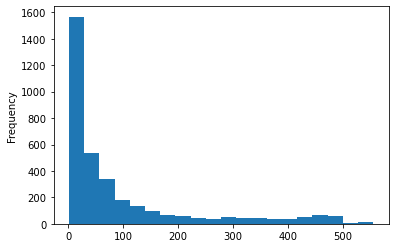

In [37]:
df_appliques.groupby("txt_name")["txt_name"].count().plot.hist(bins=20)

### Top 10 des textes les plus appliqués :

In [38]:
df_appliques.groupby("txt_name")["txt_name"].count().sort_values(ascending= False).head(10)

txt_name
Code de l'environnement Articles R. 541-42 à R. 541-48 : Traitement des déchets (Livre V, Titre IV, Chapitre Ier, Section 3)                                                            555
Code de l'Environnement - Articles R. 543-124 à R. 543-134 : Piles et accumulateurs                                                                                                     553
Code de l'environnement Articles L. 541-1 à L. 541-50 : Prévention et gestion des déchets (Livre V, Titre IV, Chapitre Ier)                                                             552
Code de l'environnement Articles R. 543-171-1 à R. 543-206-4 : Équipements électriques et électroniques (Livre V, Titre IV, Chapitre III, Section 10)                                   552
Code de l'environnement Articles D. 541-1 à R. 541-12-18 : Dispositions générales relatives à la prévention et à la gestion des déchets (Livre V, Titre IV, Chapitre Ier, Section 1)    551
Arrêté du 29 février 2012 fixant le contenu des reg

In [39]:
df_appliques.groupby("domain")["domain"].count().sort_values(ascending= False).head(10)

domain
3. SÉCURITÉ                                           146827
1. ENVIRONNEMENT                                      126045
6. ENERGIE                                             26452
4. INSPECTION                                          11275
2. PRODUITS CHIMIQUES                                  10056
5. TRANSPORT DE MARCHANDISES DANGEREUSES ET AUTRES      1154
7. SÛRETÉ                                                495
8. SECURITE ALIMENTAIRE                                  202
Name: domain, dtype: int64

## Combien de textes appliquées par client ?

In [40]:
df_appliques.groupby("txt_node_id")["txt_node_id"].count().sort_values(ascending= False).describe()

count     573.000000
mean      575.815009
std       329.903420
min        45.000000
25%       384.000000
50%       483.000000
75%       667.000000
max      1641.000000
Name: txt_node_id, dtype: float64

<AxesSubplot:ylabel='Frequency'>

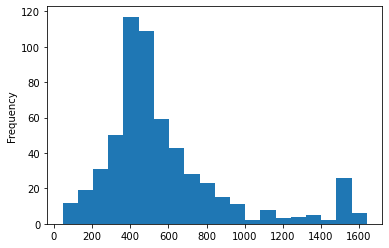

In [41]:
df_appliques.groupby("txt_node_id")["txt_node_id"].count().plot.hist(bins=20)

## Statuts des clients

In [42]:
df_nodes #Statut des clients : SITE, GROUP ou ABOVE_SITE

,id,node_status
0,2c90f5883f44af68013f564a1326558a,SITE
1,2c90f5883fcf3281013fe7c2f0eb4dbe,SITE
2,2c90f588404b48480140ce4d7d301013,SITE
3,2c90f5884109d2c401410c40ae942d95,SITE
4,2c90f5884109d2c401410c4434a433a6,SITE
...,...,...
592,ff80818174e6040901750227f26959d6,SITE
593,ff80818174e604090175022989a25da1,SITE
594,ff80818174e604090175036af76b3803,SITE
595,ff808181751301e9017522740a11111d,SITE


In [43]:
df_nodes.groupby("node_status")["node_status"].count().sort_values(ascending= False)

node_status
SITE          586
GROUP           9
ABOVE_SITE      2
Name: node_status, dtype: int64

In [44]:
df_nodes[df_nodes['id'] =='4028807d16245e4d01162478b54b7da4']

,id,node_status
224,4028807d16245e4d01162478b54b7da4,SITE


# Questions du formulaire

In [45]:
df_formulaire_question #contenu des questions

,aide,enonce_groupe,enonce_site,type,unite,id
0,NaN,Intervenez-vous (vos salariés) sur des matériaux amiantés (travaux de maintenance de bâtiments ou de machines pouvant contenir de l'amiante...) ?,Intervenez-vous (vos salariés) sur des matériaux amiantés (travaux de maintenance de bâtiments ou de machines pouvant contenir de l'amiante...) ?,1,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,NaN,"De quelles sources (scellées, non scellées) ou appareils (accélérateurs de particules, générateurs de rayons X) s'agit-il?","De quelles sources (scellées, non scellées) ou appareils (accélérateurs de particules, générateurs de rayons X) s'agit-il?",0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,NaN,NaN,Le site est-il localisé sur une zone sismique ? Merci de préciser le type de classe.,1,NaN,013D407166EC4FA56EB1E1F8CBE183B9
3,NaN,Etes-vous soumis ou avez-vous un plan de prévention des risques naturels (PPRN) ?,Etes-vous soumis ou avez-vous un plan de prévention des risques naturels (PPRN) ?,1,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,NaN,NaN,Plans et localisation des bâtiments communiqués à Tennaxia,0,NaN,0266E33D3F546CB5436A10798E657D97
...,...,...,...,...,...,...
311,NaN,Votre entreprise est-elle soumise à l'obligation de conclure un accord ou d'élaborer un plan d'actions relatif de la prévention de la pénibilité ? \n (Obligation en fonction du pourcentage de salariés exposés ou de l'indice de sinistralité au niveau de l'entreprise),Votre entreprise est-elle soumise à l'obligation de conclure un accord ou d'élaborer un plan d'actions relatif de la prévention de la pénibilité ? \n (Obligation en fonction du pourcentage de salariés exposés ou de l'indice de sinistralité au niveau de l'entreprise),1,NaN,FC221309746013AC554571FBD180E1C8
312,NaN,Quelle(s) autre(s) rubrique(s) ICPE 3000 concern(ent) au moins l'un de vos sites ?,Quelle(s) autre(s) rubrique(s) ICPE 3000 concern(ent) votre site ?,0,NaN,FC490CA45C00B1249BBE3554A4FDF6FB
313,NaN,De quelle convention collective relève votre entreprise ?,De quelle convention collective relève votre entreprise ?,0,NaN,FD86425BAD0511E7B3CE001851D17886
314,NaN,Quelles sont les technologies utilisées pour l'éclairage des locaux (LED ….),Quelles sont les technologies utilisées pour l'éclairage des locaux (LED ….),0,NaN,FE131D7F5A6B38B23CC967316C13DAE2


In [53]:
df_formulaire_question.groupby("type")["type"].count().sort_values(ascending= False)

type
1    233
0     39
2     25
4     10
3      6
5      3
Name: type, dtype: int64

In [54]:
df_formulaire_question[df_formulaire_question["type"]==5]

,aide,enonce_groupe,enonce_site,type,unite,id
100,NaN,"Merci de nous indiquer les autres informations (caractéristiques, spécificités de certains sites) que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.",Merci de nous indiquer les autres informations ou caractéristiques que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.,5,NaN,46BA9F2A6976570B0353203EC4474217
117,NaN,"Merci de nous indiquer les autres informations (caractéristiques, spécificités de certains sites) que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.",Merci de nous indiquer les autres informations ou caractéristiques que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.,5,NaN,621BF66DDB7C962AA0D22AC97D69B793
205,NaN,"Merci de nous indiquer les autres informations (caractéristiques, spécificités de certains sites) que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.",Merci de nous indiquer les autres informations ou caractéristiques que vous jugez pertinentes à nous communiquer dans le cadre de cette prestation.,5,NaN,A8F15EDA80C50ADB0E71943ADC8015CF


In [55]:
df_formulaire_question.groupby("unite")["unite"].count().sort_values(ascending= False)

unite
t            3
t/an         2
sites        1
personnes    1
pers./m²     1
m³           1
Name: unite, dtype: int64

In [56]:
df_formulaire_question.groupby("unite")["unite"].count().sort_values(ascending= False)

unite
t            3
t/an         2
sites        1
personnes    1
pers./m²     1
m³           1
Name: unite, dtype: int64

In [57]:
print(sum(pd.isnull(df_formulaire_question['enonce_groupe'])), sum(pd.isnull(df_formulaire_question['enonce_site'])))

34 4


In [58]:
df_formulaire_questionnaire #grandes parties du questionnaire

,couleur,nom,position,node_id,id
0,#999999,INFORMATIONS GENERALES,0,4028807d16245e4d0116247888d0793d,5E0F845AA9A537AAD2DD3E0FB248A44E
1,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123
2,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
3,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
4,#6600CC,SURETE - MALVEILLANCE,4,4028807d16245e4d0116247888d0793d,C540C42A14EA11E9B4A4FA163E3BC92C
5,#ff6600,HSE,1,4028807d16245e4d0116247888d0793d,D597C271A829F7FBE0C01FD4109854EE


In [59]:
df_formulaire_questionnaire_pages  #ordre des pages d’un questionnaire
#questionnaire_id = id de la partie dans la base précédente ?

,page_order,questionnaire_id,pages_id
0,7,7FAE1993C5027CE676D551A2BDFE6C04,03C4AD7888A7E4C54975A8DDC0B7FD89
1,6,7FAE1993C5027CE676D551A2BDFE6C04,07B1E039C8678D21175FB8EBBB4E06FC
2,5,7FAE1993C5027CE676D551A2BDFE6C04,0EDF28B413735DC197E24A5AA46B188C
3,9,77D3F03B15B1CFEE59C5D16D0BE37123,0EED0BAB1E6211E9997EFA163E3BC92C
4,8,ABD03ACB00C00FE88EB701362C91F463,10EF07CC6EEC0BD16EFC9069C8D4C02D
5,4,7FAE1993C5027CE676D551A2BDFE6C04,1D74D37FA4D45B83F416CDDB677E6EBA
6,2,5E0F845AA9A537AAD2DD3E0FB248A44E,2432C61399654853656C3A9E96D691A8
7,0,ABD03ACB00C00FE88EB701362C91F463,29C2FB940CD1EAF39D8BF1AFCA0E23B3
8,3,ABD03ACB00C00FE88EB701362C91F463,2A8F77A459506726759AE4FB9C805504
9,4,77D3F03B15B1CFEE59C5D16D0BE37123,37DFB171EB069D6050FF04026321A82E


In [60]:
df_formulaire_questionnaire_pages["pages_id"].nunique() #A quoi ça sert ??

44

In [61]:
df_merge_pages = pd.merge(df_formulaire_questionnaire_pages, df_formulaire_questionnaire, how='left', left_on=['questionnaire_id'], right_on=['id'])

In [62]:
df_merge_pages

,page_order,questionnaire_id,pages_id,couleur,nom,position,node_id,id
0,7,7FAE1993C5027CE676D551A2BDFE6C04,03C4AD7888A7E4C54975A8DDC0B7FD89,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
1,6,7FAE1993C5027CE676D551A2BDFE6C04,07B1E039C8678D21175FB8EBBB4E06FC,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
2,5,7FAE1993C5027CE676D551A2BDFE6C04,0EDF28B413735DC197E24A5AA46B188C,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
3,9,77D3F03B15B1CFEE59C5D16D0BE37123,0EED0BAB1E6211E9997EFA163E3BC92C,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123
4,8,ABD03ACB00C00FE88EB701362C91F463,10EF07CC6EEC0BD16EFC9069C8D4C02D,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
5,4,7FAE1993C5027CE676D551A2BDFE6C04,1D74D37FA4D45B83F416CDDB677E6EBA,#cc3333,SECURITE,3,4028807d16245e4d0116247888d0793d,7FAE1993C5027CE676D551A2BDFE6C04
6,2,5E0F845AA9A537AAD2DD3E0FB248A44E,2432C61399654853656C3A9E96D691A8,#999999,INFORMATIONS GENERALES,0,4028807d16245e4d0116247888d0793d,5E0F845AA9A537AAD2DD3E0FB248A44E
7,0,ABD03ACB00C00FE88EB701362C91F463,29C2FB940CD1EAF39D8BF1AFCA0E23B3,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
8,3,ABD03ACB00C00FE88EB701362C91F463,2A8F77A459506726759AE4FB9C805504,#0066ff,ENERGIE,5,4028807d16245e4d0116247888d0793d,ABD03ACB00C00FE88EB701362C91F463
9,4,77D3F03B15B1CFEE59C5D16D0BE37123,37DFB171EB069D6050FF04026321A82E,#009900,ENVIRONNEMENT,2,4028807d16245e4d0116247888d0793d,77D3F03B15B1CFEE59C5D16D0BE37123


In [63]:
df_merge_pages.groupby("nom")["nom"].count().sort_values(ascending= False)

nom
SECURITE                  11
ENVIRONNEMENT             11
ENERGIE                    9
SURETE - MALVEILLANCE      5
HSE                        5
INFORMATIONS GENERALES     3
Name: nom, dtype: int64

# Questions à choix

In [64]:
df_formulaire_question_choix  #id des choix pour les questions de type choix
#question_id à joindre avec id de df_formulaire_question

,choix_order,choix_id,question_id
0,0,4C6AE4E18514140E78D6116F51E7DDEB,006F52E9102A8D3BE2FE5614F42BA989
1,1,C3AE13B68907389B5DAAD4C19E4E9816,006F52E9102A8D3BE2FE5614F42BA989
2,0,83DFF3966C9101CA46EDEBCF7C685810,013D407166EC4FA56EB1E1F8CBE183B9
3,1,A7ACD0346943D0C4BF2AB3B45C074E7C,013D407166EC4FA56EB1E1F8CBE183B9
4,0,C6212798B661ABC546CD2B6F5B6F596D,02522A2B2726FB0A03BB19F2D8D9524D
...,...,...,...
565,1,CB1597C6D9D4B5CFF7898A6D46C892D2,FA7CDFAD1A5AAF8370EBEDA47A1FF1C3
566,0,A2E19C8756B94B17676101F1A80EC189,FBD7939D674997CDB4692D34DE8633C4
567,1,FE5D8C00C7E6E2FA3157CF9929E60238,FBD7939D674997CDB4692D34DE8633C4
568,0,7BDF486C2DD1A1F1D65C3EBE95C07956,FC221309746013AC554571FBD180E1C8


In [65]:
df_formulaire_question_choix['question_id'].nunique()  #Nombre de questions à choix

264

In [66]:
df_formulaire_question_choix[df_formulaire_question_choix["choix_order"]==4]

,choix_order,choix_id,question_id
68,4,7DAFE892A2B7B8E8677EA5637945D3EE,182BE0C5CDCD5072BB1864CDEE4D3D6E
128,4,A806E46E93485DAFE9434D43B328C730,33E75FF09DD601BBE69F351039152189
166,4,943C6F161191D0972A59B2B6E33EA379,47D1E990583C9C67424D369F3414728E
258,4,28946B8FFFB211E8AA9BFA163EAD7035,7A614FD06C325499F1680B9896BEEDEB
306,4,0FDC8C911EB9588083F2FAFFE1638343,918317B57931B6B7A7D29490FE5EC9F9
354,4,9AF2F77FBF1846C4B79588741011242A,A3F390D88E4C41F2747BFA2F1B5F87DB
452,4,201E4EA807CCE8544AB651811B087FFD,C74D97B01EAE257E44AA9D5BADE97BAF
493,4,495DD01C8B150B8974BE6D37C140CABD,D947BF06A885DB0D477D707121934FF8
563,4,91709D7BA262AB4FDFF5F60D2559B9E6,F899139DF5E1059396431415E770C6DD


In [67]:
df_formulaire_question_choix.groupby("choix_order")["choix_order"].count().sort_values(ascending= False)

choix_order
1    264
0    264
2     16
3     12
4      9
5      5
Name: choix_order, dtype: int64

# Réponses

In [68]:
df_formulaire_reponse
#node_id: id du client

,node_id,valeur_actee,non_concerne_acte,commentaire_acte,question_id
0,2c90f5883f44af68013f564a1326558a,c3ae13b6-8907-389b-5daa-d4c19e4e9816,\0,NaN,006F52E9102A8D3BE2FE5614F42BA989
1,2c90f5883f44af68013f564a1326558a,scellées pour RX,\0,NaN,01161AAA0B6D1345DD8FE4E481144D84
2,2c90f5883f44af68013f564a1326558a,83dff396-6c91-01ca-46ed-ebcf7c685810,\0,Oui\n2,013D407166EC4FA56EB1E1F8CBE183B9
3,2c90f5883f44af68013f564a1326558a,3816c6a2-2a60-e9f2-1430-954151ba8d1a,\0,NaN,02522A2B2726FB0A03BB19F2D8D9524D
4,2c90f5883f44af68013f564a1326558a,fa4a1c04-c8b1-b7a5-fe48-4351eb44bcca,\0,"nous recevons des matières dangereuses (gazole, solvant, acide,...) en grande quantité et nous expédions/transportons instersite (venissieux/st priest, La valbonne) de petites quantités ~1000L",02E74F10E0327AD868D138F2B4FDD6F0
...,...,...,...,...,...
117075,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F033AB37C30201F73F142449D037028D
117076,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,F457C545A9DED88F18ECEE47145A72C0
117077,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,FBD7939D674997CDB4692D34DE8633C4
117078,ff8081817528e71501754135cdfb6d7b,NaN,\0,NaN,FD86425BAD0511E7B3CE001851D17886


In [69]:
print(df_formulaire_reponse["node_id"].nunique(), df_formulaire_reponse["question_id"].nunique())

597 316


In [70]:
print(sum(pd.isnull(df_formulaire_reponse['valeur_actee'])), sum(pd.isnull(df_formulaire_reponse['commentaire_acte'])))

23303 98160


In [71]:
df_formulaire_reponse.groupby("non_concerne_acte")["non_concerne_acte"].count().sort_values(ascending= False)

non_concerne_acte
\0    114971
       2109
Name: non_concerne_acte, dtype: int64

## Caractéristiques du nombre de réponses répondues 

In [72]:
df_formulaire_reponse.groupby("node_id")["node_id"].count().sort_values(ascending= False).describe()

count    597.000000
mean     196.113903
std       56.316881
min        1.000000
25%      160.000000
50%      208.000000
75%      236.000000
max      285.000000
Name: node_id, dtype: float64

<AxesSubplot:ylabel='Frequency'>

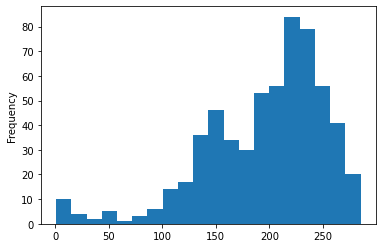

In [45]:
df_formulaire_reponse.groupby("node_id")["node_id"].count().plot.hist(bins=20)   
#Eliminer les questionnaires avec moins de 100 réponses ?

## Partie pas importante sur les pages du questionnaires

In [47]:
df_formulaire_page_questions

,question_order,page_id,question_id
0,9,47F7C1F4C2D5515A0CD260621108E4CF,006F52E9102A8D3BE2FE5614F42BA989
1,1,80203BE21F599D39C8B7B3CB06ED3D54,01161AAA0B6D1345DD8FE4E481144D84
2,11,C5419C4A14EA11E9B4A4FA163E3BC92C,01161AAA0B6D1345DD8FE4E481144D84
3,8,F5CDBDCDF75DFAA1A6BA541A72E4EAD8,013D407166EC4FA56EB1E1F8CBE183B9
4,4,F5CDBDCDF75DFAA1A6BA541A72E4EAD8,02522A2B2726FB0A03BB19F2D8D9524D
...,...,...,...
349,11,DD21F9B31A4B17DD76D46B0B99C2AA08,FC221309746013AC554571FBD180E1C8
350,6,72F5B7EEB6C88A541413B840C52EA8D8,FC490CA45C00B1249BBE3554A4FDF6FB
351,11,7CC7CF85CC4B366B592FDF236A4196CC,FD86425BAD0511E7B3CE001851D17886
352,6,4C13098DC9F7734C0055465EE5B6C80B,FE131D7F5A6B38B23CC967316C13DAE2


In [48]:
df_formulaire_page_questions["page_id"].nunique()

44

In [49]:
df_formulaire_page_questions["question_id"].nunique()

321